In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df = pd.read_csv('diabetes.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [74]:
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[replace_zero] = df[replace_zero].replace(0, np.nan)
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Feature Scaling & Train/Test Split

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [76]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X.shape, y.shape

((768, 8), (768,))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
imputer = SimpleImputer()

In [78]:
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [79]:
X_test_scaled.mean(axis=0)
X_test_scaled.std(axis=0)

array([1.07407414, 1.05468783, 0.99795034, 1.19375299, 0.88273621,
       1.09010482, 0.91555259, 1.10003751])

In [80]:
np.isnan(X_test).sum(axis=0)
np.std(X_train, axis=0)


array([ 3.31056497, 30.07750028, 12.08933248,  8.40306604, 86.90417111,
        7.73431907,  0.33657233, 11.49406506])

In [81]:
X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

In [82]:
log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)

C:\Users\singh\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

In [83]:
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

In [84]:
y_pred_log[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
y_prob_log[:10]

array([9.90309676e-05, 5.38405507e-05, 5.17553495e-05, 1.83680721e-04,
       6.82337999e-05, 8.88233864e-05, 5.73567935e-05, 2.10035862e-04,
       8.14069901e-05, 7.47067530e-05])

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [87]:
lda.fit(X_train_scaled, y_train)

,"solver solver: {'svd', 'lsqr', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'lsqr': Least squares solution. Can be combined with shrinkage or custom covariance estimator. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator... versionchanged:: 1.2 `solver=""svd""` now has experimental Array API support. See the :ref:`Array API User Guide ` for more details.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter.This should be left to None if `covariance_estimator` is used.Note that shrinkage works only with 'lsqr' and 'eigen' solvers.For a usage example, see:ref:`sphx_glr_auto_examples_classification_plot_lda.py`.",None
,"priors priors: array-like of shape (n_classes,), default=NoneThe class prior probabilities. By default, the class proportions areinferred from the training data.",None
,"n_components n_components: int, default=NoneNumber of components (<= min(n_classes - 1, n_features)) fordimensionality reduction. If None, will be set tomin(n_classes - 1, n_features). This parameter only affects the`transform` method.For a usage example, see:ref:`sphx_glr_auto_examples_decomposition_plot_pca_vs_lda.py`.",None
,"store_covariance store_covariance: bool, default=FalseIf True, explicitly compute the weighted within-class covariancematrix when solver is 'svd'. The matrix is always computedand stored for the other solvers... versionadded:: 0.17",False
,"tol tol: float, default=1.0e-4Absolute threshold for a singular value of X to be consideredsignificant, used to estimate the rank of X. Dimensions whosesingular values are non-significant are discarded. Only used ifsolver is 'svd'... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimatethe covariance matrices instead of relying on the empiricalcovariance estimator (with potential shrinkage).The object should have a fit method and a ``covariance_`` attributelike the estimators in :mod:`sklearn.covariance`.if None the shrinkage parameter drives the estimate.This should be left to None if `shrinkage` is used.Note that `covariance_estimator` works only with 'lsqr' and 'eigen'solvers... versionadded:: 0.24",None


In [88]:
y_pred_lda = lda.predict(X_test_scaled)
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]

In [89]:
y_pred_lda[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [90]:
y_prob_lda[:10]

array([0.24584638, 0.14254821, 0.09172532, 0.16543622, 0.50251315,
       0.40690456, 0.01117479, 0.3635498 , 0.60523621, 0.78105193])

In [91]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [92]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log


array([[99,  0],
       [55,  0]])

In [93]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_lda


array([[84, 15],
       [20, 35]])

In [94]:
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

acc_log, prec_log, rec_log, f1_log


C:\Users\singh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.6428571428571429, 0.0, 0.0, 0.0)

In [95]:
acc_lda = accuracy_score(y_test, y_pred_lda)
prec_lda = precision_score(y_test, y_pred_lda)
rec_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

acc_lda, prec_lda, rec_lda, f1_lda


(0.7727272727272727, 0.7, 0.6363636363636364, 0.6666666666666666)

In [96]:
results = pd.DataFrame({
    'Models':['Logistic Regression', 'LDA'],
    'Accuracy' : [acc_log, acc_lda],
    'Precision': [prec_log, prec_lda],
    'Recall': [rec_log, rec_lda],
    'F1': [f1_log, f1_lda],
})

results

,Models,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.642857,0.0,0.000000,0.000000
1,LDA,0.772727,0.7,0.636364,0.666667


In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
auc_lda = roc_auc_score(y_test, y_prob_lda)


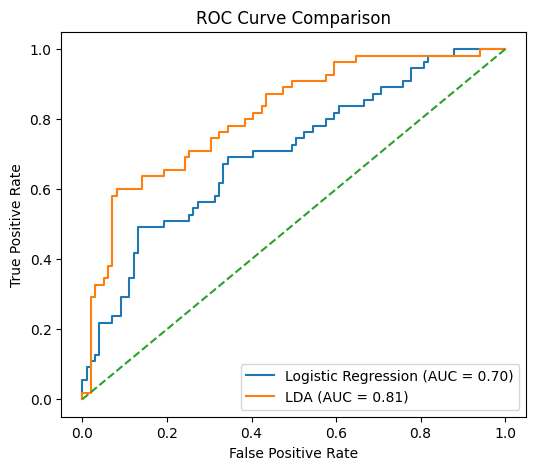

In [98]:
plt.figure(figsize = (6, 5))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [99]:
feature_names = X.columns
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
6,DiabetesPedigreeFunction,0.578000
5,BMI,0.091163
0,Pregnancies,0.064191
1,Glucose,0.036400
7,Age,0.035818
3,SkinThickness,0.009893
4,Insulin,-0.001196
2,BloodPressure,-0.010913


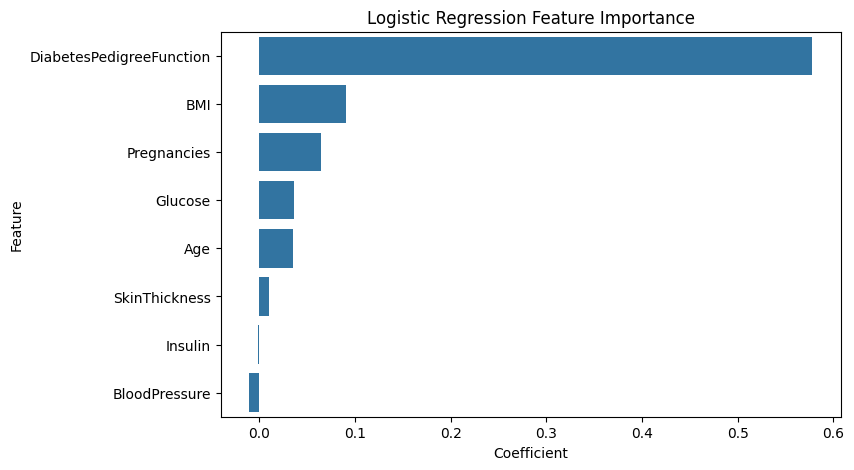

In [100]:
plt.figure(figsize = (8, 5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df
)
plt.title('Logistic Regression Feature Importance')
plt.show()